# First experiments for Gait Recognition

Lets try to print the data first.

__Observations:__
1. The fist column represents the user id which is between 1 to 10.
2. The 2nd column represents the session id which represents separate unique sessions for a user. ss_id of two user_ids can be the same in some, but the denote separate walks for their respective users. This should not be considered as one session.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
signals = pd.read_csv('./data/train.csv')
values, counts = np.unique(signals.iloc[:, 0], return_counts=True)

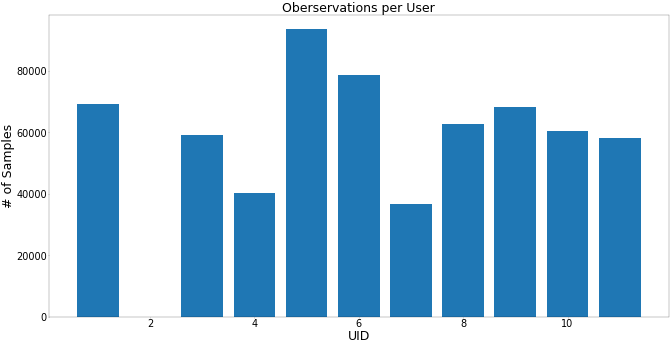

In [39]:
frame_width, frame_height = 40, 20
img_dpi = 20
axis_label_size = 45
axis_tick_size = 35
img_title_size = 45

plt.figure(figsize=(frame_width, frame_height), dpi=img_dpi)
plt.bar(values, counts)
plt.title("Oberservations per User", fontsize=img_title_size)
plt.xlabel("UID", fontsize=axis_label_size)
plt.xticks(fontsize=axis_tick_size)
plt.ylabel("# of Samples", fontsize=axis_label_size)
plt.yticks(fontsize=axis_tick_size)
plt.show()

In [30]:
sub_table_map = {}
user_ids = np.unique(signals["u_id"])
for uid in user_ids:
    sub_table_map[uid] = {}

    sub_table_map[uid]["data"] = signals[signals["u_id"] == uid]
    sub_table_map[uid]["rows"] = len(sub_table_map[uid]["data"])
    sub_table_map[uid]["sessions"] = len(np.unique(sub_table_map[uid]["data"]["ss_id"]))

## Lets try to prouduce a horizontally scrollable plot for temporal series data

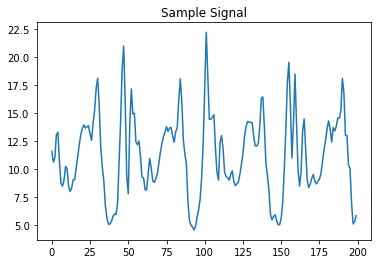

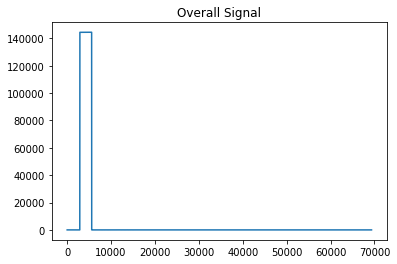

In [58]:
x_comp = sub_table_map[1]["data"].x.to_numpy()
y_comp = sub_table_map[1]["data"].y.to_numpy()
z_comp = sub_table_map[1]["data"].z.to_numpy()

total_signal = np.sqrt(x_comp**2 + y_comp**2 + z_comp**2)
plt.plot(total_signal[:200])
plt.title("Sample Signal")
plt.show()

plt.plot(total_signal)
plt.title("Overall Signal")
plt.show()

Filter out erroneous data by amplitude. Signal length peaks around 25 for __UID=1__. Plot all signals on the same plot and inspect their amplitudes.

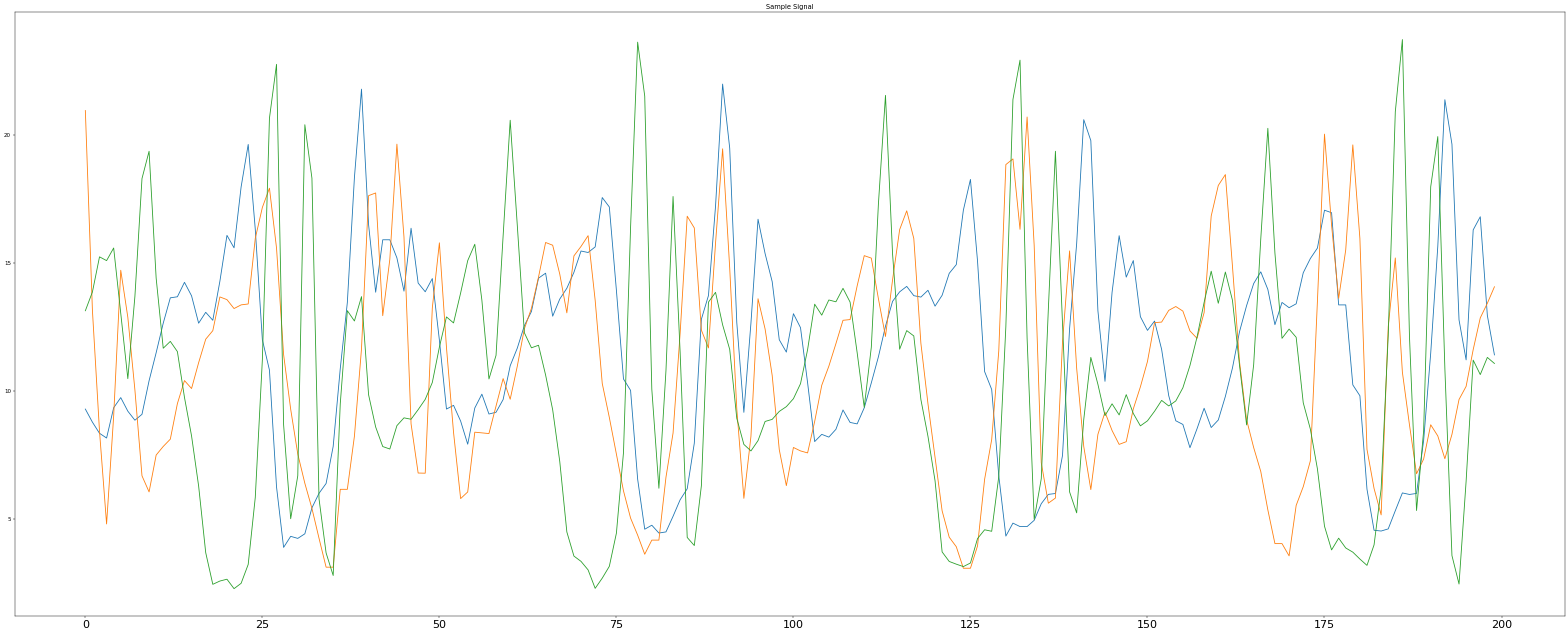

In [69]:
plt.figure(figsize=(50, 20), dpi=40)
for uid in range(1, 5):
    if uid == 2:
        continue

    x_comp = sub_table_map[uid]["data"].x.to_numpy()
    y_comp = sub_table_map[uid]["data"].y.to_numpy()
    z_comp = sub_table_map[uid]["data"].z.to_numpy()

    total_signal = np.sqrt(x_comp**2 + y_comp**2 + z_comp**2)
    plt.plot(total_signal[1000:1200])
    
plt.xticks(fontsize=20)
plt.title("Sample Signal")
plt.show()